In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
reg_2021 = pd.read_csv("./player_stats/2021/regular_season.csv")

In [3]:
pgs = reg_2021.loc[reg_2021["POS"] == "PG"].sort_values("PTS",ascending = False)

In [4]:
sgs = reg_2021.loc[reg_2021["POS"] == "SG"].sort_values("PTS",ascending = False)

In [5]:
pfs = reg_2021.loc[reg_2021["POS"] == "PF"].sort_values("PTS",ascending = False)

In [6]:
sfs = reg_2021.loc[reg_2021["POS"] == "SF"].sort_values("PTS",ascending = False)

In [7]:
cs = reg_2021.loc[reg_2021["POS"] == "C"].sort_values("PTS",ascending = False)

(0, 32.54732154395873)

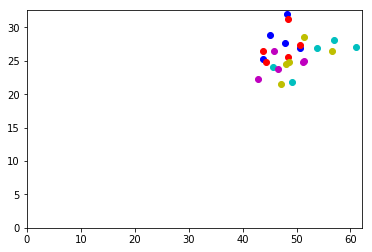

In [8]:
plt.scatter("FG%","PTS",marker="o",c = "b", data = pgs.head(5),)
plt.scatter("FG%","PTS",marker="o",c = "r", data = sgs.head(5))
plt.scatter("FG%","PTS",marker="o",c = "c", data = pfs.head(5))
plt.scatter("FG%","PTS",marker="o",c = "m", data = sfs.head(5))
plt.scatter("FG%","PTS",marker="o",c = "y", data = cs.head(5))
plt.xlim(0)
plt.ylim(0)

In [20]:
def segment_data(df, top_n_players):
    pos_dict = {}
    pos = ['PG','SG','PF','SF','C']
    
    for p in pos:
        pos_dict[p] = df.loc[df['POS'] == p].sort_values("PTS",ascending = False).head(top_n_players)
        
    return pos_dict

In [21]:
def get_data(last_n_years, top_n_players):
    from time import strftime, localtime
    import pandas as pd
    
    this_year = int(strftime("%Y",localtime())) -1
    dfs = {}
    for y in range(this_year,this_year - last_n_years,-1):
        df = pd.read_csv("./player_stats/"+str(y)+"/regular_season.csv")
        dfs[y] = segment_data(df, top_n_players)
        
    return dfs

In [22]:
dfs = get_data(3,10)

In [23]:
dfs[2021]['SG'][['Name','PTS','Team']]

,Name,PTS,Team
513,Bradley Beal,31.3,WSH
210,Zach LaVine,27.4,CHI
611,Donovan Mitchell,26.4,UTAH
169,Devin Booker,25.6,PHX
342,James Harden,24.8,HOU
1,Jaylen Brown,24.7,BOS
23,James Harden,24.6,BKN
131,Paul George,23.3,LAC
595,CJ McCollum,23.1,POR
343,Victor Oladipo,21.2,HOU


In [25]:
dfs[2021]['sg'.upper()][["Name","POS","Team","PTS","AST","FG%","3P%","3PM"]]

,Name,POS,Team,PTS,AST,FG%,3P%,3PM
513,Bradley Beal,SG,WSH,31.3,4.4,48.5,34.9,2.2
210,Zach LaVine,SG,CHI,27.4,4.9,50.7,41.9,3.4
611,Donovan Mitchell,SG,UTAH,26.4,5.2,43.8,38.6,3.4
169,Devin Booker,SG,PHX,25.6,4.3,48.4,34.0,1.9
342,James Harden,SG,HOU,24.8,10.4,44.4,34.7,3.1
1,Jaylen Brown,SG,BOS,24.7,3.4,48.4,39.7,2.8
23,James Harden,SG,BKN,24.6,10.9,47.1,36.6,2.7
131,Paul George,SG,LAC,23.3,5.2,46.7,41.1,3.2
595,CJ McCollum,SG,POR,23.1,4.7,45.8,40.2,3.6
343,Victor Oladipo,SG,HOU,21.2,5.0,40.7,32.0,2.5


In [12]:
data = get_top_n_players(10,dfs)

In [36]:
from jupyter_dash import JupyterDash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import plotly.express as px
from datetime import date

app = JupyterDash(__name__)
colours = {'text': '#7FDBFF', 'background':'#111111'}
text_size = {'H1':48,'H2':40,'text':36}

app.layout = html.Div(style={'backgroundColor':colours['background'],'fontFamily':'calibri'}, children=[

    html.H1(children='NBA Data visualisation',
        style = {'textAlign': 'center',
                 'color':colours['text'],
                 'fontSize':text_size['H1']}),

    html.H2(children='A simple dashboard exercise',
            style = {'textAlign': 'center','color':colours['text'],'fontSize':text_size['H2']}),

    html.Div(children=[
            html.Div(children = [
                    dcc.Dropdown(
                        options = [
                            {"value":"Point Guard", "label":"PG"},
                            {"value":"Shooting Guard", "label":"SG"},
                            {"value":"Power Forward", "label":"PF"},
                            {"value":"Small Forward", "label":"SF"},
                            {"value":"Centre", "label":"C"},
                            {"value":"Forward", "label":"F"}
                        ],
                        value = "PG"
                    ),
                    html.Div(id = 'pos_dropdown')
                ],
                style = {"padding":10,'textAlign': 'left','color':colours['text'],'fontSize':text_size['text'],"flex":1}
            ),
            
            html.Div(children = [
                        html.Label("Stats",style = {'textAlign': 'right','color':colours['text'],'fontSize':text_size['text']}),

                        dcc.RadioItems(
                            options=[
                                {'label': 'PTS','value':'pts'},
                                {'label': 'AST','value':'ast'},
                                {'label': 'FG%','value':'fg%'},
                                {'label': '3P%','value':'3p%'}
                            ]
                        )
                    ], style = {'textAlign': 'right','color':colours['text'],'fontSize':text_size['text'],"flex":2}
            )
        ],style = {'display':'flex','flex-direction': 'row'}
    )


#     html.Br(),
#     html.Br(),

#     html.Div([
#         dcc.RangeSlider(
#             id = 'range_slider',
#             min = 0,
#             max = 23,
#             step = 1,
#             value = [0,23],
#             allowCross = False,
#             tooltip = {'placement':'bottom','always_visible':True}
#         ),
#         html.Div(id='out_range_slider')
#     ])


    # dcc.Graph(
    #     id='example-graph',
    #     figure=None
    # )
])

In [37]:
app.run_server(mode = "inline")

/home/blunt/.local/lib/python3.7/site-packages/jupyter_dash/jupyter_app.py:139: UserWarning:

The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.



In [17]:
pgs[["Name","Team","PTS","FG%","3P%","FT%","2P%","AST","BLK","STL"]].head()

,Name,Team,PTS,FG%,3P%,FT%,2P%,AST,BLK,STL
112,Stephen Curry,GS,32.0,48.2,42.1,91.6,56.9,5.8,0.1,1.2
594,Damian Lillard,POR,28.8,45.1,39.1,92.8,51.9,7.5,0.3,0.9
323,Luka Doncic,DAL,27.7,47.9,35.0,73.0,56.7,8.6,0.5,1.0
22,Kyrie Irving,BKN,26.9,50.6,40.2,92.2,56.1,6.0,0.7,1.4
429,Trae Young,ATL,25.3,43.8,34.3,88.6,49.1,9.4,0.2,0.8


In [24]:
import numpy as np

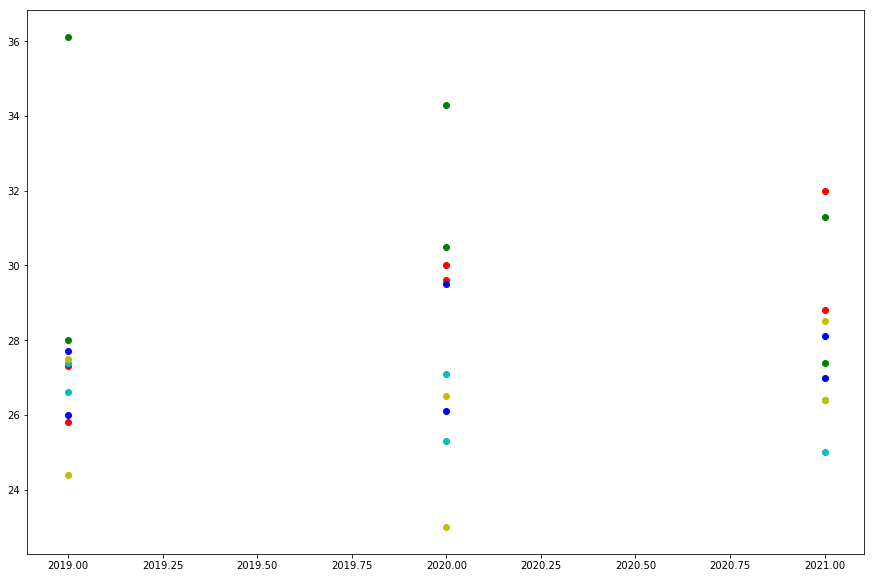

In [41]:
plt.figure(figsize=(15,10))
# plt.scatter("FG%","PTS", data = data[0][2021])
# plt.text(x=x coordinate, y=y coordinate, s=string to be displayed)
# plt.text(df.G[df.Team=='TOT'],df.GA[df.Team=='TOT'],"TOT", color='red')
pos_idx = ["PG","SG","PF","SF","C"]
n = 2
cs = ["r","g","b","c","y"]
for i in dfs.keys():
    for k in range(len(pos_idx)):
        y = dfs[i].loc[dfs[i]["POS"] == pos_idx[k]].sort_values("PTS",ascending = False).head(n)
        x = i * np.ones(len(y))
        
#         y = data[i][year]["PTS"].values[0]
#         x = year#data[i][2021]["FG%"].values[i]
        label = dfs[i]["Name"]

        plt.scatter(x,y["PTS"],c=cs[k])
#         plt.annotate(label,
#                     xy=(x, y["PTS"]), #show point 
#                     xytext=(5, 2), #show annotate
#                     textcoords='offset points',
#                     ha='right',
#                     va='bottom')
n = len(dfs.keys())
# plt.xticks(np.arange(3), ['Tom', 'Dick', 'Sue'])
# plt.xticks(np.arange(0, 1, step=0.2)) 
# plt.ylim(0)
# plt.xlim(0)
#     plt.text(data[0][2021]["PTS"].values[i],
#              data[0][2021]["FG%"].values[i],
#              data[0][2021]["Name"].values[i],
#              verticalalignment='center',
#              transform=ax.transAxes)


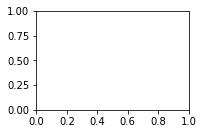

In [47]:
plt.subplot(224)

In [32]:
dfs.keys()

dict_keys([2021, 2020, 2019])